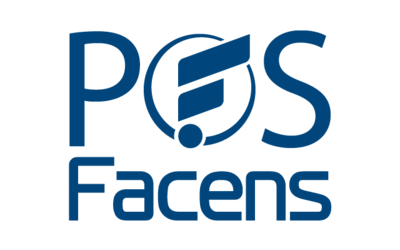


### Visualização de Dados

### Especialização em Ciência de Dados - FACENS - Turma 2019.2

### Professor Matheus Mota

**Alunos:**

Gustavo Sarti **RA** 191512

Evandro Antunes Durda Capelari **RA** 191509

In [ ]:
import numpy as np 
import pandas as pd 
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolor
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
from matplotlib.pyplot import figure
from pandas.plotting import parallel_coordinates

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Professor Carvalho - Consultoria de Ginásios



![Insignea de Fogo - Lavaridge](http://img1.wikia.nocookie.net/__cb20140715010704/pokemon/images/b/be/Heat_badge.png)


Como é sabido uma das coisas fundamentais desse mundo do Pokemons é a existência da Liga em que estão inscritos os Ginásios. Os Ginásios Pokémon em nossa liga normalmente são marcados pela separação dos Pokémon por seus diversos tipos.

# Panorama Geral do Pokemons de Kanto

Nosso cliente um ginásio de fogo precisa de informações para o planejamento e manutenção do Ginásio. Faremos aqui uma breve análise dos 151 Pokemons encontrados na região de Kanto.

* Sun burst  >> Total >> Tipo >> Nível

In [ ]:
df = pd.read_csv('/kaggle/input/pokemon-gen1/Pokemon.csv')
dfColors = pd.read_csv('/kaggle/input/pokemon-gen1/PokemonTypesColor.csv')
colors = pd.Series(dfColors.Color.values,index=dfColors.Type).to_dict()

fig = px.sunburst(df, path=['Type 1', 'Stage', 'Name'], values='Total', width=800, height=600)

fig.show()



### Pokemons por tipo

Em Kanto há predominância de pokemons de água, dada a geografia da regiã. Isso impõe uma dificuldade para nosso cliente, já que fogo tem desvantagem contra água. Em compensação ele está de igual para os pokemons do tipo Grass e Bug, sobre os quais tem vantagem.

* Barras: Quantidade Por Tipo

In [ ]:
type1 = df['Type 1'].value_counts()
dftype2 = df['Type 2']
dftype2.dropna(inplace=True)
type2 = dftype2.value_counts()
types = pd.concat([type1, type2])
types.sort_values(inplace=True,ascending=False)

colorList = []
for typ in types.keys():
    colorList.append(pltcolor.to_rgb(colors[typ]))

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(types.keys(), types.to_list(), color=colorList)
plt.title('Incidência de Pokemons por Tipo')
plt.show()

### Panorama dos estágios evolutivos de Kanto

Pokemons podem ter de 1 a 3 estágios evolutivos. Os de 3º nivel evolutivo tendem a ser mais fortes, mas entre os que não tem evoluções encontramos pokemons com alto nível de poder.

* Gráfico de Setor - Percentual de Estágios de Evolução Presentes em Kanto
* Boxplot - Relação de Poder (Total) pra cada estágio evolutivo.
* Pair Plot - Verificando a relação de todas as váriaveis com o Poder total (Destacando por Tipo)

In [ ]:
e = df['Stage'].value_counts()
# create data
niveis = '1º Nível','2º Nível','3º Nível'
evolucoes=e
 
# Create a pieplot
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.pie(e, labels=niveis,autopct='%1.1f%%')
plt.title('Percentual de Pokemons por Níves de Evolução')
plt.show()

In [ ]:
# Boxplot comparando o 'Total' por estágio de evolução po pokemon
# A ideia é representar melhor o que o scatterplot na célula em cima tá mostrando
dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
b = sns.boxplot(ax=ax, x=df["Stage"], y=df["Total"], palette="Blues")
b.set_title('Comparações do Total de Poder Por níves de Evolução')
b.set(xlabel='Evolutive Stage',ylabel='Total Power')


In [ ]:
s = sns.pairplot(df,height=6, x_vars=['HP', 'Attack', 'Defense'], y_vars='Total',  hue="Type 1")
s.fig.suptitle('Correlação de Total de Poder e Atributos')
sns.pairplot(df,height=6, x_vars=['Sp. Atk', 'Sp. Def', 'Speed'], y_vars='Total',  hue="Type 1")


### Percentual de Lendários

### Nível de poder

* Total - Bloxplot
* Distribuição e correlação entre o poder e os atributos
* Sun burst  >> Total >> Tipo >> Nível



In [ ]:
def make_radar(pokemons, titulo):
    abilitys = ['HP', 'Ataque', 'Defesa', 'At. Especial', 'Def Especial', 'Velocidade']
        
    colns = 2
    linhas = 1
    if len(pokemons) < colns:
        colns = len(pokemons)
    else:
        linhas = int(math.ceil(len(pokemons) / colns))
    
    
    fig = make_subplots(rows=linhas, cols=colns, specs=[[{'type': 'polar'}]*colns]*linhas)

    ic = 1
    il = 1

    for pokemon in pokemons:
        attributos = df.loc[df['Name'] == pokemon, ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].iloc[0]
        fig.add_trace(go.Scatterpolar(
          name = pokemon,
          r = attributos,
          theta = abilitys,
        ), il, ic)
        
        ic = ic + 1
        if(ic > colns):
            ic=1
            il = il+1

    fig.update_traces(fill='toself')
    fig.update_layout(
        title=dict(text=titulo,
                   y=0.9,
                   x=0.5,
                   xanchor='center',
                   yanchor='top'),
        polar=dict(radialaxis=dict(visible=True,range=[25,150])),
        showlegend=True
    )
    fig.show()
    
lendarios = df[df['Legendary'] == True]
make_radar(lendarios['Name'].to_list(),'Comparação de Atributos de Pokemons Lendários')


## Os Pokemons de fogo em Kanto

Os mais fortes pokemons de fogo

* Gráfico de teia dos pokemons para comparação

* Encontrando os 4 melhores

* Comparando seus Atributos


In [ ]:
typeToFind = 'Fire'
df_fire = df[(df['Type 1'] == typeToFind) | (df['Type 2'] == typeToFind)]

df_attributes = df_fire.drop(columns=['Name', 'Type 1', 'Type 2', 'Total', 'Legendary'])
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
parallel_coordinates(df_attributes, 'Stage', colormap=plt.get_cmap("Set1"))
plt.title('Projeção Geral dos Atributos dos Pokemons de Fogo de Kanto')
plt.show()


In [ ]:
typeToFind = 'Fire'
df_fire = df[(df['Type 1'] == typeToFind) | (df['Type 2'] == typeToFind)]
df_fire = df_fire[df_fire['Legendary'] == False]

def print_comparacao(atributo, quantidade):
    dfbest = df_fire[['Name',atributo]]
    debest = dfbest.sort_values(by=atributo,inplace=True,ascending=False)
    valor_minimo = dfbest.iloc[quantidade][atributo] 
    mask = dfbest[atributo] <= valor_minimo
    colors = np.array(['r']*len(dfbest))
    colors[mask.values] = 'c'
    figure(num=None, figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k')
    plt.bar(list(dfbest['Name']), list(dfbest[atributo]), color = colors)
    plt.title('Os Quatro Melhors Pokemons de Fogo de Kanto (por Total de Poder)')
    plt.show()
    return dfbest.iloc[:quantidade]['Name']

dfbestnames = print_comparacao('Total',4)


In [ ]:
make_radar(dfbestnames,'Comparação de Atributos dos Mais Fortes Pokemons de Fogo (Não Lendários)')
